# Jupyter

1. ファイル名の変更： 画面上部の「Untitled」の部分をクリックすると，Notebookのファイル名を変えられます．保存されたNotebookは「xxxx.ipynb」と言う名前で保存されます．
2. コードの実行： Shift+Enterで選択中の「セル」（灰色の四角で囲まれた部分）のコードを実行できます
3. セルの追加： Shift+Enterで選択中の「セル」のコードを実行後，自動的に次のセルが追加されます．もしくは，メニューにある「＋」ボタンでも追加できます．
4. セルの削除： メニューにある「はさみ」ボタンで選択中のセルが削除されます．
5. 補完機能： 変数や関数名を書きかけている最中にTABで補完することができます．
5. ヘルプの表示： Notebook中の関数にカーソルを移動させ，Shift+TABで関数のヘルプが表示されます．また，「^」ボタンを押すと詳しい説明が見られます．
6. Notebookの保存： Ctrl+sかメニューにある「保存」ボタンでNotebookが保存されます．
7. 課題の提出： NotebookをHTMLに変換したものをWordやPDF形式のレポートと一緒に提出してください．メニュー「File」→「Donwload as」→「HTML (.thml)」でNotebookをHTMLに変換できます．また，WordやPDF形式のレポートには表示させたグラフを含めてください（グラフを画像にするには，plt.savvfigを用います）．

# Matplotlib

Matplotlibはグラフ描画のためのPythonパッケージです． https://matplotlib.org/

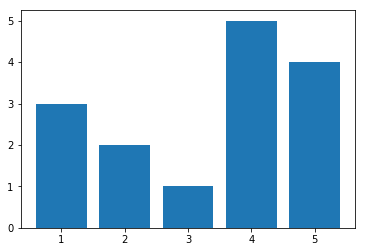

In [41]:
%matplotlib inline
# ↑MatplotlibのグラフをNotebook中に表示するための設定
import matplotlib.pyplot as plt # pltという名前をつけて，Matplotlibのpyplotモジュールを読み込む

X = [1, 2, 3, 4, 5] # x軸の値
Y = [3, 2, 1, 5, 4] # y軸の値

plt.bar(x=X, height=Y) # 棒グラフの表示
plt.savefig("sample.png") # グラフの保存
plt.show() #グラフの表示

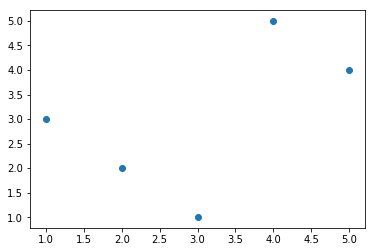

In [42]:
plt.scatter(x=X, y=Y) # 散布図の表示
plt.show() #グラフの表示

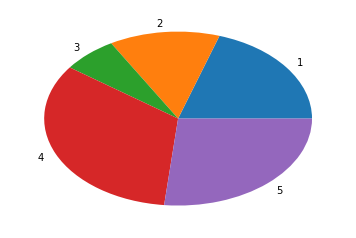

In [43]:
plt.pie(x=Y, labels=X) # 円グラフの表示（Yの割合を表示，各ラベルはXの値）
plt.show() #グラフの表示

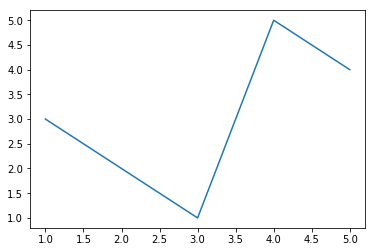

In [44]:
plt.plot(X, Y) # 折れ線グラフの表示
plt.show() #グラフの表示

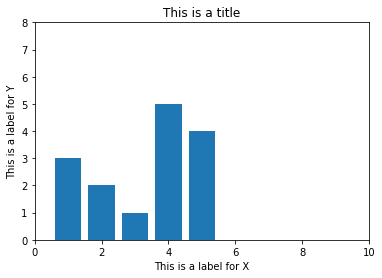

In [45]:
# 各種グラフの設定
plt.bar(x=X, height=Y) # 棒グラフの表示

plt.xlabel("This is a label for X") # x軸のラベル
plt.ylabel("This is a label for Y") # y軸のラベル
plt.title("This is a title") # タイトル
plt.xlim(0, 10) # x軸の範囲設定: 0から10まで
plt.ylim(0, 8) # y軸の範囲設定: 0から8まで

plt.show() #グラフの表示

# Pandas

Pandasはデータ分析のためのPythonパッケージです． https://pandas.pydata.org/

関係データベースのような表形式のデータ構造DataFrameを利用することが可能です．

In [50]:
import pandas as pd
from IPython.display import display

data = [
    [1, 2, 3],
    [1, 5, 6],
    [2, 8, 9]
]

df = pd.DataFrame(data, index=["One", "Two", "Three"], columns=["First", "Second", "Third"]) # DataFrameを作成
display(df) # display(x)でxの中身を見やすくに表示させられる

# indexの使い方
display(df.loc["One"]) # Oneというindexを持った行を取得
display(df.iloc[1]) # 2番目の行を取得

# columnの使い方
display(df["First"]) # Firstという名前をつけた列を取得

,First,Second,Third
One,1,2,3
Two,1,5,6
Three,2,8,9


First     1
Second    2
Third     3
Name: One, dtype: int64

First     1
Second    5
Third     6
Name: Two, dtype: int64

One      1
Two      1
Three    2
Name: First, dtype: int64

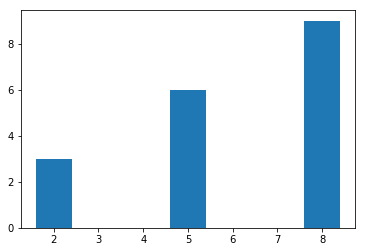

In [51]:
# Matplotlibとの連携
X = df["Second"]
Y = df["Third"]
plt.bar(X, Y)
plt.show()

In [52]:
# DataFrameでSQLのようなこともできる

# SELECT * FROM df WHERE First = 4
display(df[df["First"] == 2])

# SELECT First, Second FROM df
display(df[["First", "Second"]])

# SELECT First, AVG(Second) FROM df GROUP BY First
display(df.groupby(["First"]).mean().reset_index()[["First", "Second"]])

,First,Second,Third
Three,2,8,9


,First,Second
One,1,2
Two,1,5
Three,2,8


,First,Second
0,1,3.5
1,2,8.0


In [54]:
# データベースとの連携
import urllib

sql = "SELECT * FROM kyoto_weather WHERE year = 2005 AND month = 12 AND day >= 20"
sql = urllib.parse.quote(sql) # URLエンコード（URL中に含めても問題ないような形式に変換）
url = "http://course.mpkato.net/scripts/iam/json.php?query=" + sql
print(url) # 確認できるようにURLを表示

try:
    # ここでエラーが起こった場合，except以下が実行される．例えば，SQLに誤りがある場合．
    df = pd.read_json(url)
    display(df)
except:
    # エラーが起こった場合こちらが実行される
    response = urllib.request.urlopen(url).read() # URLにアクセスし表示された内容を読み込む
    print(response) # 内容を表示


http://course.mpkato.net/scripts/iam/json.php?query=SELECT%20%2A%20FROM%20kyoto_weather%20WHERE%20year%20%3D%202005%20AND%20month%20%3D%2012%20AND%20day%20%3E%3D%2020


,day,day_week,highest,humidity,lowest,month,weather,year
0,20,Tue,9.0,48,0.3,12,Fine,2005
1,21,Wed,8.2,60,0.2,12,Cloudy,2005
2,22,Thu,3.4,70,-3.7,12,Snow,2005
3,23,Fri,6.2,52,-2.5,12,Fine,2005
4,24,Sat,5.3,55,1.3,12,Fine,2005
5,25,Sun,9.0,44,-1.0,12,Fine,2005
6,26,Mon,6.8,61,3.4,12,Fine,2005
7,27,Tue,6.1,58,0.8,12,Fine,2005
8,28,Wed,7.1,54,1.6,12,Fine,2005
9,29,Thu,7.8,49,-0.7,12,Fine,2005


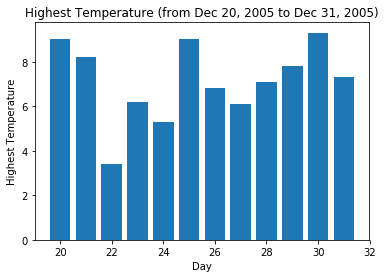

In [55]:
# 最高気温をグラフで表示
plt.bar(x=df["day"], height=df["highest"])
plt.xlabel("Day")
plt.ylabel("Highest Temperature")
plt.title("Highest Temperature (from Dec 20, 2005 to Dec 31, 2005)")
plt.show()